In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import pearsonr

In [2]:
def scm_fit(X, y):
    """
    Fits a convex combination of the rows of X that minimizes the MSE
    Args:
        X (np.ndarray): Input features, shape (n_samples, n_features).
        y (np.ndarray): Target values, shape (n_samples,).
    Returns:
        np.ndarray: Optimized weights, shape (n_features).
    """
    n_features = X.shape[1]

    # Objective function: Mean Squared Error
    def objective_function(weights):
        y_predicted = np.dot(X, weights)
        return np.mean((y_predicted - y) ** 2)

    # Constraint: sum(weights) == weight_sum_constraint
    def sum_constraint(weights):
        return np.sum(weights) - 1
    
    def pearsonr_weights(weights):
        y_predicted = np.dot(X, weights)
        return float(pearsonr(y, y_predicted).statistic)

    # Bounds: Ensure all weights are nonnegative
    bounds = [(0, 1)] * n_features

    # Initial guess for weights
    initial_weights = np.ones(n_features) / (n_features)

    # Define constraints as a dictionary
    constraints = ({'type': 'eq', 'fun': sum_constraint})

    # Use the minimize function to find the optimized weights
    result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract the optimized weights
    optimized_weights = result.x

    # Extract the MSE
    corr = pearsonr_weights(optimized_weights)

    return optimized_weights, corr


In [3]:
df = pd.read_csv('../data/estimates/SNAP_gap_estimates/snap_gap_estimates.csv', index_col = 0)
df

,YEAR,STATEFIPS,SNAP Gap
0,2006,1,0.737655
1,2006,2,0.791812
2,2006,4,0.803563
3,2006,5,0.695652
4,2006,6,0.880446
...,...,...,...
895,2023,51,0.747827
896,2023,53,0.688119
897,2023,54,0.574448
898,2023,55,0.679568


In [4]:
pivoted = df.pivot_table(values = "SNAP Gap", index = "YEAR", columns= "STATEFIPS")
pivoted

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.737655,0.791812,0.803563,0.695652,0.880446,0.874442,0.846468,0.812210,0.801845,0.779484,...,0.826275,0.672099,0.772516,0.897128,0.794507,0.832000,0.794335,0.648496,0.835795,0.875134
2007,0.736629,0.795936,0.807691,0.705001,0.876318,0.876878,0.843523,0.801790,0.827898,0.781076,...,0.818789,0.671253,0.791273,0.903686,0.772744,0.830536,0.793809,0.650207,0.829511,0.888369
2008,0.722729,0.794300,0.786337,0.705368,0.867016,0.876656,0.833922,0.786542,0.802138,0.773953,...,0.813446,0.660734,0.784141,0.899646,0.746934,0.821817,0.780114,0.621168,0.809003,0.893002
2009,0.680698,0.784144,0.736041,0.687821,0.844104,0.849991,0.815133,0.745884,0.748637,0.726422,...,0.791563,0.617172,0.754877,0.869386,0.680752,0.796649,0.719247,0.605678,0.763656,0.876467
2010,0.636504,0.752229,0.659659,0.655973,0.816364,0.813961,0.764079,0.698756,0.676531,0.662380,...,0.734097,0.573133,0.713662,0.828959,0.635369,0.762112,0.660636,0.566582,0.688554,0.841504
2011,0.586557,0.717061,0.648245,0.646076,0.795822,0.791391,0.734012,0.644902,0.626001,0.627633,...,0.701801,0.558881,0.686202,0.806207,0.607869,0.739284,0.630216,0.569523,0.664051,0.837399
2012,0.587125,0.708344,0.632087,0.632969,0.780072,0.778586,0.718944,0.605606,0.597708,0.604392,...,0.719560,0.542687,0.683695,0.812473,0.601656,0.725695,0.607269,0.557574,0.648303,0.853205
2013,0.586681,0.695740,0.644768,0.636656,0.771241,0.771613,0.707807,0.610932,0.580864,0.599129,...,0.729655,0.538086,0.687204,0.834791,0.571322,0.724510,0.621321,0.559939,0.637838,0.838392
2014,0.590233,0.713011,0.667643,0.641422,0.762320,0.775331,0.690508,0.604078,0.587565,0.601818,...,0.732645,0.557567,0.704871,0.847533,0.597596,0.732245,0.626832,0.541985,0.644590,0.848236


In [5]:
training_data = pivoted[pivoted.index <= 2021]
training_data

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.737655,0.791812,0.803563,0.695652,0.880446,0.874442,0.846468,0.812210,0.801845,0.779484,...,0.826275,0.672099,0.772516,0.897128,0.794507,0.832000,0.794335,0.648496,0.835795,0.875134
2007,0.736629,0.795936,0.807691,0.705001,0.876318,0.876878,0.843523,0.801790,0.827898,0.781076,...,0.818789,0.671253,0.791273,0.903686,0.772744,0.830536,0.793809,0.650207,0.829511,0.888369
2008,0.722729,0.794300,0.786337,0.705368,0.867016,0.876656,0.833922,0.786542,0.802138,0.773953,...,0.813446,0.660734,0.784141,0.899646,0.746934,0.821817,0.780114,0.621168,0.809003,0.893002
2009,0.680698,0.784144,0.736041,0.687821,0.844104,0.849991,0.815133,0.745884,0.748637,0.726422,...,0.791563,0.617172,0.754877,0.869386,0.680752,0.796649,0.719247,0.605678,0.763656,0.876467
2010,0.636504,0.752229,0.659659,0.655973,0.816364,0.813961,0.764079,0.698756,0.676531,0.662380,...,0.734097,0.573133,0.713662,0.828959,0.635369,0.762112,0.660636,0.566582,0.688554,0.841504
2011,0.586557,0.717061,0.648245,0.646076,0.795822,0.791391,0.734012,0.644902,0.626001,0.627633,...,0.701801,0.558881,0.686202,0.806207,0.607869,0.739284,0.630216,0.569523,0.664051,0.837399
2012,0.587125,0.708344,0.632087,0.632969,0.780072,0.778586,0.718944,0.605606,0.597708,0.604392,...,0.719560,0.542687,0.683695,0.812473,0.601656,0.725695,0.607269,0.557574,0.648303,0.853205
2013,0.586681,0.695740,0.644768,0.636656,0.771241,0.771613,0.707807,0.610932,0.580864,0.599129,...,0.729655,0.538086,0.687204,0.834791,0.571322,0.724510,0.621321,0.559939,0.637838,0.838392
2014,0.590233,0.713011,0.667643,0.641422,0.762320,0.775331,0.690508,0.604078,0.587565,0.601818,...,0.732645,0.557567,0.704871,0.847533,0.597596,0.732245,0.626832,0.541985,0.644590,0.848236


In [6]:
training_y = training_data[25]
training_X = training_data.loc[:, training_data.columns != 25].values

In [7]:
weights, corr = scm_fit(training_X, training_y)
weights

array([0.00000000e+00, 7.16938786e-02, 3.52025025e-02, 3.56394361e-18,
       7.89544609e-02, 8.74078534e-02, 8.42485279e-19, 5.62787526e-19,
       8.99909027e-04, 1.11228017e-02, 6.27669728e-02, 5.21842025e-04,
       8.24484806e-02, 2.25915779e-03, 0.00000000e+00, 0.00000000e+00,
       1.67665045e-18, 0.00000000e+00, 2.80931916e-02, 8.05972332e-02,
       7.74117129e-03, 2.58708608e-02, 6.55378176e-19, 6.64073831e-19,
       0.00000000e+00, 1.51788304e-17, 5.27048170e-02, 1.30149694e-18,
       2.82434666e-17, 1.23271883e-01, 4.06806470e-02, 1.52426266e-17,
       3.56044263e-02, 7.57147799e-03, 3.28786962e-02, 2.12828648e-18,
       2.04214549e-02, 5.52006424e-19, 0.00000000e+00, 8.01763113e-19,
       9.74774970e-19, 3.78520326e-18, 3.02968910e-03, 3.92559032e-04,
       1.93537915e-02, 5.94007183e-03, 0.00000000e+00, 5.90678450e-02,
       2.35023247e-02])

In [8]:
X = pivoted.loc[:, pivoted.columns != 25].values
y = pivoted[25]

In [9]:
synth = X @ weights
synth

array([0.8140016 , 0.81416984, 0.8016539 , 0.77035498, 0.72678524,
       0.70064815, 0.68220919, 0.67796576, 0.68103179, 0.68294933,
       0.68697049, 0.69737998, 0.70094032, 0.72768554, 0.69079138,
       0.67040118, 0.66422549, 0.66783323])

In [10]:
diffs = y[-2:] - synth[-2:]
diffs

YEAR
2022   -0.062475
2023   -0.089621
Name: 25, dtype: float64

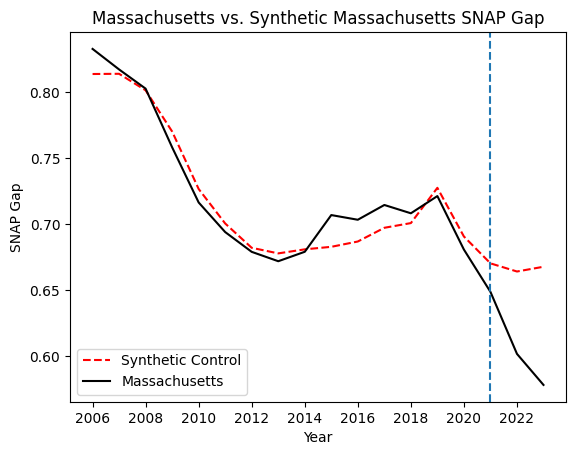

In [11]:
years = pd.to_datetime(pivoted.index.astype(str), format="%Y")


plt.plot(years, synth, label = "Synthetic Control", linestyle = '--', color = 'red')
plt.plot(years, y, label = "Massachusetts", linestyle = '-', color = 'black')
plt.axvline(x = pd.to_datetime('2021', format="%Y"), linestyle = '--')
plt.legend()
plt.title("Massachusetts vs. Synthetic Massachusetts SNAP Gap")
plt.xlabel("Year")
plt.ylabel("SNAP Gap")
plt.savefig('../output/synthetic_control_plots/no_covariates_real_vs_synthetic.png')

In [12]:
non_zero_weights = np.where(weights>0.00000000001)
non_zero_weights = non_zero_weights[0]

In [13]:
import us

def fips_to_state(fips_code, return_type='abbr'):
    """
    Converts a state FIPS code to its corresponding state abbreviation or name.

    Args:
        fips_code (str): A two-digit FIPS code representing a state.
        return_type (str, optional): Specifies the return type, either 'abbr' for abbreviation (default) or 'name' for full name.

    Returns:
        str: The state abbreviation or name corresponding to the FIPS code.
             Returns None if the FIPS code is invalid.
    """
    fips_code = str(fips_code)
    if len(fips_code) == 1:
        fips_code = '0' + fips_code
    state = us.states.lookup(fips_code)
    if state:
        if return_type == 'abbr':
            return state.abbr
        elif return_type == 'name':
            return state.name
        else:
             raise ValueError("Invalid return_type. Choose 'abbr' or 'name'.")
    return None


In [14]:
synthetic_cols = training_data.columns.to_list()
synthetic_cols.remove(25)

In [15]:
non_zero_weights_dict = {}

for state in non_zero_weights:
    weight = weights[state]
    state = synthetic_cols[state]
    state_name = fips_to_state(state, 'name')
    non_zero_weights_dict[state_name] = float(weight)

In [16]:
non_zero_weights_dict

{'Alaska': 0.07169387856776856,
 'Arizona': 0.03520250249647034,
 'California': 0.07895446087584126,
 'Colorado': 0.08740785342629256,
 'Florida': 0.0008999090266074614,
 'Georgia': 0.011122801745399511,
 'Hawaii': 0.06276697275109988,
 'Idaho': 0.0005218420253379475,
 'Illinois': 0.08244848061919229,
 'Indiana': 0.0022591577922353437,
 'Maine': 0.028093191570975097,
 'Maryland': 0.0805972331678737,
 'Michigan': 0.007741171293886973,
 'Minnesota': 0.025870860769581523,
 'Nevada': 0.05270481695573067,
 'New Mexico': 0.1232718833355688,
 'New York': 0.04068064698289983,
 'North Dakota': 0.03560442631971926,
 'Ohio': 0.007571477987745685,
 'Oklahoma': 0.03287869619097698,
 'Pennsylvania': 0.0204214548768633,
 'Utah': 0.0030296890964251655,
 'Vermont': 0.000392559032138513,
 'Virginia': 0.019353791526892747,
 'Washington': 0.005940071825661282,
 'Wisconsin': 0.05906784502721617,
 'Wyoming': 0.023502324713599157}

In [17]:
pivoted[pivoted.index <= 2021].loc[:, (training_data.columns != state) & (training_data.columns != 25)]

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,45,46,47,48,49,50,51,53,54,55
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.737655,0.791812,0.803563,0.695652,0.880446,0.874442,0.846468,0.812210,0.801845,0.779484,...,0.717884,0.826275,0.672099,0.772516,0.897128,0.794507,0.832000,0.794335,0.648496,0.835795
2007,0.736629,0.795936,0.807691,0.705001,0.876318,0.876878,0.843523,0.801790,0.827898,0.781076,...,0.715403,0.818789,0.671253,0.791273,0.903686,0.772744,0.830536,0.793809,0.650207,0.829511
2008,0.722729,0.794300,0.786337,0.705368,0.867016,0.876656,0.833922,0.786542,0.802138,0.773953,...,0.700356,0.813446,0.660734,0.784141,0.899646,0.746934,0.821817,0.780114,0.621168,0.809003
2009,0.680698,0.784144,0.736041,0.687821,0.844104,0.849991,0.815133,0.745884,0.748637,0.726422,...,0.662009,0.791563,0.617172,0.754877,0.869386,0.680752,0.796649,0.719247,0.605678,0.763656
2010,0.636504,0.752229,0.659659,0.655973,0.816364,0.813961,0.764079,0.698756,0.676531,0.662380,...,0.621684,0.734097,0.573133,0.713662,0.828959,0.635369,0.762112,0.660636,0.566582,0.688554
2011,0.586557,0.717061,0.648245,0.646076,0.795822,0.791391,0.734012,0.644902,0.626001,0.627633,...,0.606348,0.701801,0.558881,0.686202,0.806207,0.607869,0.739284,0.630216,0.569523,0.664051
2012,0.587125,0.708344,0.632087,0.632969,0.780072,0.778586,0.718944,0.605606,0.597708,0.604392,...,0.590868,0.719560,0.542687,0.683695,0.812473,0.601656,0.725695,0.607269,0.557574,0.648303
2013,0.586681,0.695740,0.644768,0.636656,0.771241,0.771613,0.707807,0.610932,0.580864,0.599129,...,0.596801,0.729655,0.538086,0.687204,0.834791,0.571322,0.724510,0.621321,0.559939,0.637838
2014,0.590233,0.713011,0.667643,0.641422,0.762320,0.775331,0.690508,0.604078,0.587565,0.601818,...,0.615272,0.732645,0.557567,0.704871,0.847533,0.597596,0.732245,0.626832,0.541985,0.644590


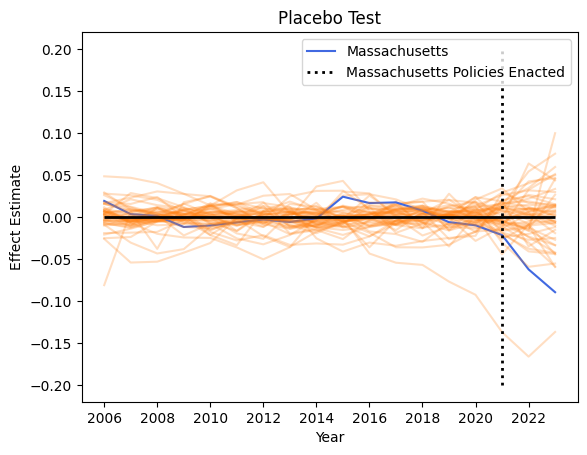

In [18]:
def run_trial(state):
    training_data = pivoted[pivoted.index <= 2021]
    training_y = training_data[state]
    training_X = training_data.loc[:, (training_data.columns != state) & (training_data.columns != 25)].values
    weights, corr = scm_fit(training_X, training_y)
    X = pivoted.loc[:, (pivoted.columns != state) & (pivoted.columns != 25)].values
    y = pivoted[state]
    synth = X @ weights
    diffs = y - synth
    return diffs, corr

diff_dict = {}
corrs = {}

for state in pivoted.columns: 
    diffs, corr = run_trial(state)
    diff_dict[state] = diffs.copy()
    corrs[state] = corr
    
    is_mass = state == 25
    diffs.index = pd.to_datetime(diffs.index.astype(str), format="%Y")
    plt.plot(diffs,
             color="royalblue" if is_mass else "C1",
             alpha=1 if is_mass else 0.25,
             label="Massachusetts" if is_mass else None)

plt.hlines(y=0, xmin=pd.to_datetime('2006', format="%Y"), xmax=pd.to_datetime('2023', format="%Y"), lw=2, color="Black")
plt.vlines(x=pd.to_datetime('2021', format="%Y"), ymin=-0.2, ymax=0.2, linestyle=":", lw=2, label="Massachusetts Policies Enacted", color="Black")
plt.ylabel("Effect Estimate")
plt.title("Placebo Test")
plt.xlabel("Year")
plt.legend()

In [19]:
effects_df = pd.DataFrame(diff_dict).T
effects_df['corr'] = None
for state in corrs.keys():
    effects_df.loc[state, 'corr'] = corrs[state]
effects_df.head()

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,corr
1,0.002430,-0.002453,0.002750,-0.002090,0.005047,-0.016891,0.003520,0.004240,-0.003579,0.001190,-0.010325,-0.000604,0.000256,-0.000619,0.001663,0.005401,0.010800,0.004990,0.994161
2,-0.003569,-0.010171,0.000975,0.008765,0.013092,-0.002774,-0.000443,-0.014092,-0.004847,0.030252,0.028091,-0.000452,-0.022121,-0.011420,-0.014002,0.000360,-0.016850,0.099693,0.908279
4,0.004348,0.009317,0.003669,-0.003163,-0.021492,-0.001784,-0.007289,0.002995,0.009518,0.012237,0.004923,-0.007642,0.003517,0.007250,0.000565,-0.014068,0.004061,-0.019316,0.987389
5,-0.025387,-0.023923,-0.005381,-0.000310,0.002163,0.006304,0.006755,0.007703,-0.008768,0.000945,0.002473,0.016181,0.018249,-0.016154,-0.007168,0.013760,0.054076,0.075266,0.94697
6,0.001945,-0.004491,-0.006293,-0.001388,0.012613,0.017529,0.009928,0.008788,0.003851,-0.000084,0.002410,0.007184,0.005580,-0.001104,-0.028545,-0.011489,-0.030463,-0.059072,0.974328


In [21]:
def pre_post_mse_ratio(row, treatment_year):
    pre_treatment_diffs = row.loc[range(2006,treatment_year+1)]
    post_treatment_diffs = row.loc[range(treatment_year+1,2024)]
    return np.sum(post_treatment_diffs ** 2) / np.sum(pre_treatment_diffs ** 2)

In [45]:
mse_ratios = pd.DataFrame(effects_df.apply(pre_post_mse_ratio, 
                                           args = (2021,), axis = 1)).rename(columns={
                                               0:"post/pre-mse_ratio"})
mse_ratios.index = mse_ratios.index.map(fips_to_state)
mse_ratios.head()

,post/pre-mse_ratio
AL,0.272961
AK,3.280934
AZ,0.313579
AR,3.334774
CA,2.511360


In [46]:
mse_ratios['Massachusetts'] = mse_ratios.index == "MA"
mse_ratios.head()

,post/pre-mse_ratio,Massachusetts
AL,0.272961,False
AK,3.280934,False
AZ,0.313579,False
AR,3.334774,False
CA,2.511360,False


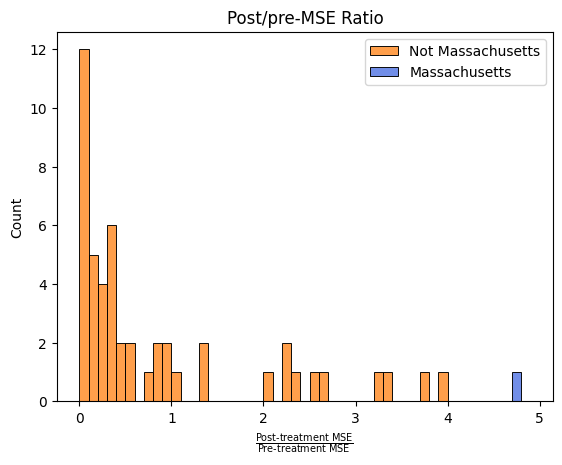

In [48]:
# Separate the data
ma_data = mse_ratios[mse_ratios['Massachusetts'] == True]
non_ma_data = mse_ratios[mse_ratios['Massachusetts'] == False]

# Plot each with desired color
sns.histplot(data=non_ma_data, x='post/pre-mse_ratio', color='C1', bins=np.arange(0, 5, 0.1), label='Not Massachusetts')
sns.histplot(data=ma_data, x='post/pre-mse_ratio', color='royalblue', bins=np.arange(0, 5, 0.1), label='Massachusetts')

# Labels and title
plt.xlabel(r'$\frac{\mathrm{Post\text{-}treatment\ MSE}}{\mathrm{Pre\text{-}treatment\ MSE}}$')
plt.title('Post/pre-MSE Ratio')
plt.legend()


In [ ]:
pre_to_post = effects_df[2023] - effects_df[2021]
pre_post_diff = pd.DataFrame(pre_to_post).rename(columns = {0: 'difference'})
pre_post_diff['corr'] = effects_df['corr']
pre_post_diff['absolute_diff'] = pre_post_diff['difference'].abs()
pre_post_diff.sort_values('absolute_diff', ascending=False, inplace = True)
pre_post_diff.index.name = "STATEFIPS"
pre_post_diff

,difference,corr,absolute_diff
STATEFIPS,,,
2,0.099333,0.908279,0.099333
24,0.071870,0.984978,0.071870
25,-0.067974,0.971678,0.067974
15,0.063139,0.984079,0.063139
5,0.061505,0.94697,0.061505
6,-0.047583,0.974328,0.047583
12,0.046384,0.989198,0.046384
32,-0.044314,0.970879,0.044314
47,0.040941,0.984804,0.040941
